In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### QUESTION 1

In [45]:
def voltage_diff(leak_potantial, voltage, memb_resistance_i_e, tau_m, synapse_current = 0):
    return (leak_potential - voltage + memb_resistance_i_e + synapse_current) / tau_m

In [46]:
leak_potential = -70     # E_L
membrane_resistance = 10 # R_m
i_e = 3.1
tau_m = 10 #* ms         # membrane time constant

v_reset = -70
v_threshold = -40

voltage_diff(leak_potential, v_reset, membrane_resistance * i_e, tau_m)

3.1

In [47]:
def q1_euler(args, v_reset, v_threshold, time=1000, step=0.25):
    ''' time(ms), step(ms)'''

    leak_potential  = args['leak_potential']
    memb_resistance = args['memb_resistance']
    i_e             = args['i_e']
    tau_m           = args['tau_m']
    
    volts = []
    time = np.linspace(0, time, int(time / step))
    v = v_reset
    for i in time:
        v = v + step * voltage_diff(leak_potential, v, memb_resistance * i_e, tau_m)
        if (v < v_threshold): 
            volts.append(v)
        else:
            volts.append(20)
            v = v_reset

    return time, volts

In [48]:
args = {
    'leak_potential': leak_potential,
    'memb_resistance': membrane_resistance,
    'i_e': i_e,
    'tau_m': tau_m
}
time, volts = q1_euler(args, v_reset, v_threshold)

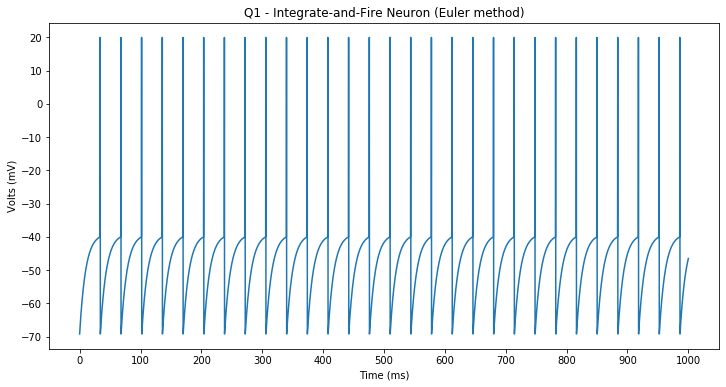

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_title('Q1 - Integrate-and-Fire Neuron (Euler method)')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Volts (mV)")
ax.plot(time, volts)
ax.set_yticks(range(-70,21,10))
ax.set_xticks(range(0,1001,100))
fig.savefig("plots/q1.png")

#### QUESTION 2

In [50]:
membrane_resistance = 6 # R_m
i_e = 3
tau_m = 20 #* ms         # membrane time constant

v_reset = -80
v_threshold = -54

voltage_diff(leak_potential, v_reset, membrane_resistance, i_e, tau_m)

12.0

In [33]:
def q2_euler(args_v, args_s, v_reset, v_threshold, time=1000, step=0.25):
    ''' time(ms), step(ms)'''

    leak_potential  = args_v['leak_potential']
    memb_resist_i_e = args_v['memb_resistance_i_e']
    tau_m           = args_v['tau_m']

    reversal_potential      = args_s['reversal_potential']
    memb_resistance_g_bar   = args_s['memb_resistance_g_bar']
    delta_s                 = args_s['delta_s']
    tau_s                   = args_s['tau_s']

    volts1 = volts2 = []
    time = np.linspace(0, time, int(time / step))
    v1 = random.randint(v_rest, v_threshold)
    v2 = random.randint(v_rest, v_threshold)
    for i in time:
        v1 = v1 + step * voltage_diff_2(leak_potential, v, memb_resist_i_e, tau_m)
        if (v < v_threshold): 
            volts.append(v)
        else:
            volts.append(20)
            v = v_reset

    return time, volts1, volts2

In [ ]:
args_voltage = {
    'leak_potential': -70,     # E_L
    'memb_resistance_i_e': 18, # R_m * I_e
    'tau_m': 20                # Membrane Time Constant
}
arge_synapse = {
    'reversal_potential': 0,      # E_L
    'memb_resistance_g_bar': 0.15 # R_m * G_bar
    'delta_s': 0.5                
    'tau_s': 10               
}
time, volts1, volts2 = euler(args, v_reset, v_threshold)
volts1

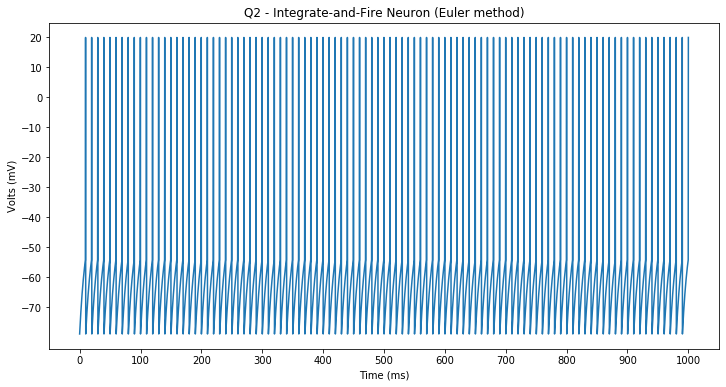

In [15]:
# fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot()
# ax.set_title('Q2 - Integrate-and-Fire Neuron (Euler method)')
# ax.set_xlabel("Time (ms)")
# ax.set_ylabel("Volts (mV)")
# ax.plot(time, volts)
# ax.set_yticks(range(-70,21,10))
# ax.set_xticks(range(0,1001,100))
# fig.savefig("plots/q2.png")